In [1]:
import warnings; warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns; sns.set(style="darkgrid")

In [2]:
# load data
data=pd.read_csv('machine-learning-ex1/ex1/ex1data1.txt',header=None,names=['population','profit'])

display(data.head())
data.shape

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


(97, 2)

In [3]:
# split dataframe into X vs. y and convert them into numpy arrays for vectorized operations
y=data.filter(['profit'],axis=1).values
X=data.drop(['profit'],axis=1).values

print(y[:5,])
print(X[:5,])

[[ 17.592 ]
 [  9.1302]
 [ 13.662 ]
 [ 11.854 ]
 [  6.8233]]
[[ 6.1101]
 [ 5.5277]
 [ 8.5186]
 [ 7.0032]
 [ 5.8598]]


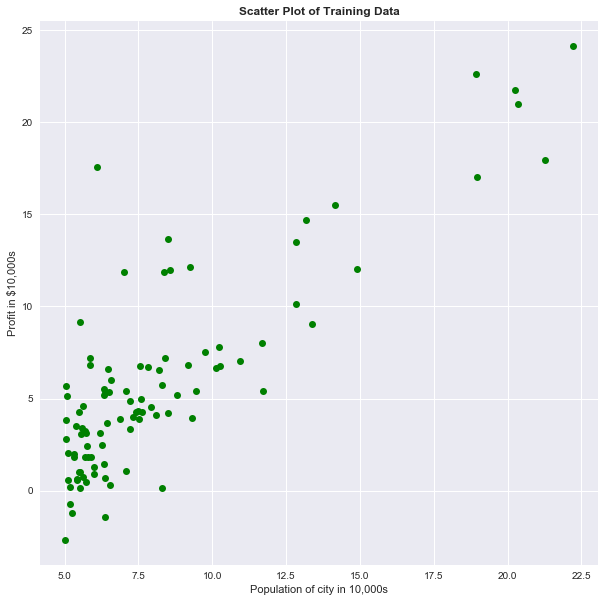

In [4]:
# visualize the data
plt.figure(figsize=(10,10))
plt.title('Scatter Plot of Training Data',weight='bold')
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X,y,'go');

In [5]:
# construct cost function, gradient and gradient descent
def cost_ftn(theta,X,y):
    sample_size=X.shape[0]
    delta=np.dot(X,theta)-y
    cost=np.dot(delta.T,delta)/(2*sample_size)
    return cost

def gradient(theta,X,y):
    sample_size=X.shape[0]
    delta=np.dot(X,theta)-y
    gradient=np.dot(X.T,delta)/sample_size
    return gradient

def gradient_descent(theta,X,y,learning_rate,num_iter):
    cost=[]
    for i in range(num_iter):
        theta=theta-learning_rate*gradient(theta,X,y)
        cost.append(cost_ftn(theta,X,y))
    return theta,cost

In [6]:
# test cost function
bias=np.ones((X.shape[0],1))
X_bias=np.concatenate((bias,X),axis=1)

theta_initial=np.zeros((X_bias.shape[1],1)) 
cost_initial=cost_ftn(theta_initial,X_bias,y)

theta_test=np.array([[-1],[2]])
cost_test=cost_ftn(theta_test,X_bias,y)

print("Cost at initial theta of zeros: {0:.2f}".format(np.asscalar(cost_initial)))
print("Cost at test theta: {0:.2f}".format(np.asscalar(cost_test)))

Cost at initial theta of zeros: 32.07
Cost at test theta: 54.24


In [7]:
# test gradient descent
num_iter=1500
learning_rate=0.01
theta_min,cost_list=gradient_descent(theta_initial,X_bias,y,learning_rate,num_iter)

print("Theta found by gradient descent:")
print(np.round(theta_min,4))

Theta found by gradient descent:
[[-3.6303]
 [ 1.1664]]


In [8]:
# predictions
predicted1=np.dot(np.array([1,3.5]),theta_min)*10000
predicted2=np.dot(np.array([1,7]),theta_min)*10000

print('For population = 35,000, we predict a profit of ${:,}'.format(round(np.asscalar(predicted1))))
print('For population = 70,000, we predict a profit of ${:,}'.format(round(np.asscalar(predicted2))))

For population = 35,000, we predict a profit of $4,520
For population = 70,000, we predict a profit of $45,342


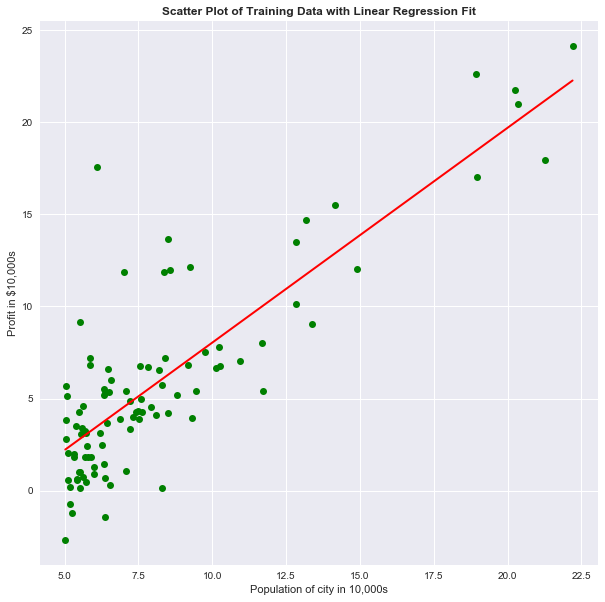

In [9]:
# fit regression line to scatter plot
x=[min(X),max(X)]
line=theta_min[0]+theta_min[1]*x

plt.figure(figsize=(10,10))
plt.title('Scatter Plot of Training Data with Linear Regression Fit',weight='bold')
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X,y,'go')
plt.plot(x,line,color='r',linewidth=2);

In [10]:
# compute cost matrix for plotting cost against theta1 & theta2
theta0=np.linspace(-10,10,100)
theta1=np.linspace(-1,4,100)
combined=np.array([(i,j) for i in theta0 for j in theta1]).T
cost_list=[]
for col in range(combined.shape[1]):
    theta=combined[:,col].reshape(2,1)
    cost_list.append(cost_ftn(theta,X_bias,y))
cost_matrix=np.array(np.split(np.array(cost_list),100,axis=0)).reshape(100,100).T

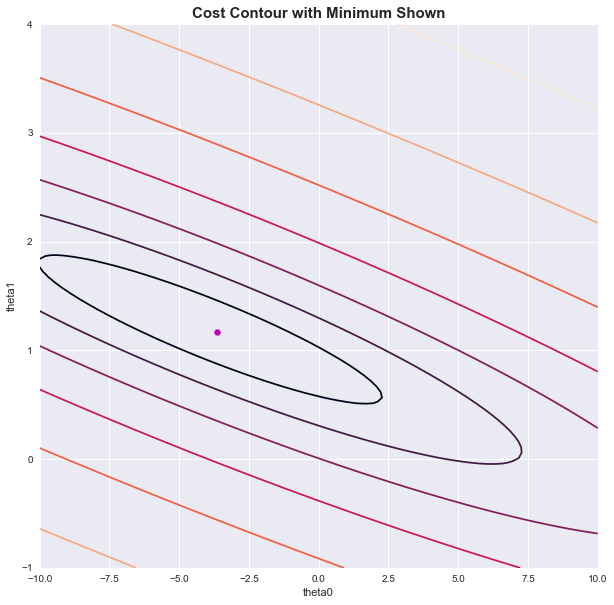

In [11]:
# make contour plot
plt.figure(figsize=(10,10))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Cost Contour with Minimum Shown',fontsize=15,weight='bold')
plt.contour(theta0,theta1,np.log10(cost_matrix),linewidth=2)
plt.plot(theta_min[0],theta_min[1],'mH');

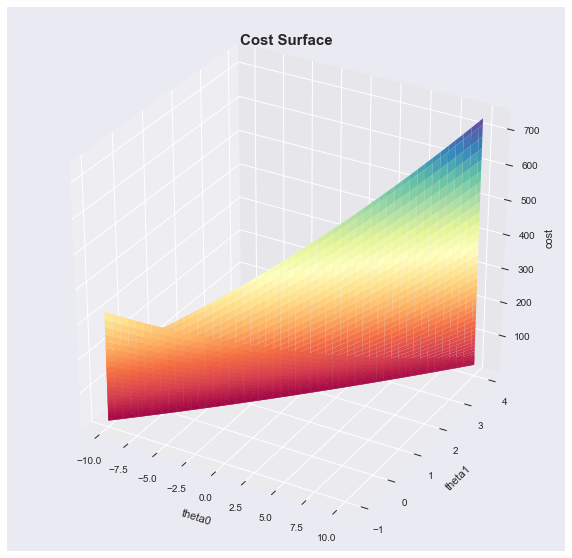

In [12]:
# make 3D surface plot
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ax.set_xlabel('theta0',labelpad=10)
ax.set_ylabel('theta1',labelpad=10)
ax.set_zlabel('cost',rotation='vertical',labelpad=10)
plt.title('Cost Surface',fontsize=15,weight='bold')
surf=ax.plot_surface(theta0,theta1,cost_matrix,cmap=cm.Spectral)